# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create url and define params
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

params={
    'q':'city name',
    'appid': weather_api_key,
    'units': 'imperial'
}

In [5]:
#Create a dictionary to store the data
data = {
    'City':[],
    'Cloudiness':[],
    'Country':[],
    'Date':[],
    'Humidity':[],
    'Lat':[],
    'Lng':[],
    'Max Temp':[],
    'Wind Speed':[]
}

In [6]:
print('Beginning Data Retrieval')
print('-----------------------------')
count = 1

for city in cities:
    print(f'Processing Record {count} | {city}')
    params['q'] = city
    response = requests.get(weather_url,params).json()
    
    if response['cod'] == '404':
        print('City not found. Skipping...')
    else:
        data['City'].append(city)
        data['Cloudiness'].append(response['clouds']['all'])
        data['Country'].append(response['sys']['country'])
        data['Date'].append(response['dt'])
        data['Humidity'].append(response['main']['humidity'])
        data['Lat'].append(response['coord']['lat'])
        data['Lng'].append(response['coord']['lon'])
        data['Max Temp'].append(response['main']['temp_max'])
        data['Wind Speed'].append(response['wind']['speed'])
    count += 1
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | kapaa
Processing Record 2 | carmen
Processing Record 3 | yellowknife
Processing Record 4 | bredasdorp
Processing Record 5 | nelson bay
Processing Record 6 | atuona
Processing Record 7 | clyde river
Processing Record 8 | ulu tiram
Processing Record 9 | mataura
Processing Record 10 | ondorhaan
City not found. Skipping...
Processing Record 11 | punta arenas
Processing Record 12 | kimi
City not found. Skipping...
Processing Record 13 | manono
Processing Record 14 | san andres
Processing Record 15 | bluff
Processing Record 16 | coquimbo
Processing Record 17 | zemio
Processing Record 18 | klaksvik
Processing Record 19 | barentsburg
City not found. Skipping...
Processing Record 20 | thinadhoo
Processing Record 21 | butaritari
Processing Record 22 | mildura
Processing Record 23 | burica
City not found. Skipping...
Processing Record 24 | kolochava
Processing Record 25 | taolanaro
City not found. Skipping...
Processing 

Processing Record 232 | rocha
Processing Record 233 | alice springs
Processing Record 234 | ketchikan
Processing Record 235 | mount pleasant
Processing Record 236 | sao sebastiao
Processing Record 237 | iskateley
Processing Record 238 | tres picos
Processing Record 239 | ongandjera
Processing Record 240 | nguruka
Processing Record 241 | tottori
Processing Record 242 | black river
Processing Record 243 | dingle
Processing Record 244 | liuhe
Processing Record 245 | sur
Processing Record 246 | barrow
Processing Record 247 | college
Processing Record 248 | namatanai
Processing Record 249 | new norfolk
Processing Record 250 | san cristobal
Processing Record 251 | hambantota
Processing Record 252 | george
Processing Record 253 | kawalu
Processing Record 254 | merano
Processing Record 255 | amapa
Processing Record 256 | necochea
Processing Record 257 | san quintin
Processing Record 258 | umzimvubu
City not found. Skipping...
Processing Record 259 | haibowan
City not found. Skipping...
Process

Processing Record 464 | berberati
Processing Record 465 | kaeo
Processing Record 466 | poso
Processing Record 467 | ponta do sol
Processing Record 468 | chapais
Processing Record 469 | plaisance-du-touch
Processing Record 470 | fantanele
Processing Record 471 | vera cruz
Processing Record 472 | santa eulalia del rio
City not found. Skipping...
Processing Record 473 | amderma
City not found. Skipping...
Processing Record 474 | ugoofaaru
Processing Record 475 | balakhninskiy
Processing Record 476 | micheweni
Processing Record 477 | jacareacanga
Processing Record 478 | areia branca
Processing Record 479 | vardo
Processing Record 480 | songadh
Processing Record 481 | antofagasta
Processing Record 482 | canico
Processing Record 483 | brae
Processing Record 484 | agirish
Processing Record 485 | verkhnyaya inta
Processing Record 486 | campbell river
Processing Record 487 | broome
Processing Record 488 | westport
Processing Record 489 | emirdag
Processing Record 490 | pontianak
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
data_df = pd.DataFrame(data)
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,90,US,1584493448,94,22.08,-159.32,75.2,6.93
1,carmen,5,MX,1584493448,78,18.63,-91.83,80.6,8.05
2,yellowknife,75,CA,1584493292,70,62.46,-114.35,-4.0,5.82
3,bredasdorp,12,ZA,1584493347,77,-34.53,20.04,66.2,8.05
4,nelson bay,20,AU,1584493448,60,-32.72,152.15,77.0,11.41


In [25]:
data_df.to_csv("weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [26]:
#Get today's date
year = time.localtime()[0]
month = time.localtime()[1]
day = time.localtime()[2]
date = f"{month}/{day}/{year}"

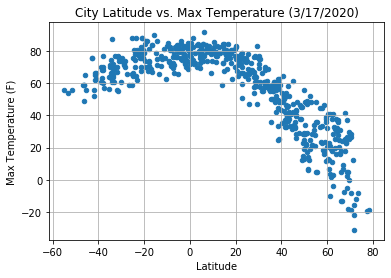

In [37]:
data_df.plot(kind='scatter',x='Lat',y='Max Temp',title=f'City Latitude vs. Max Temperature ({date})')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True)

plt.savefig('Latitude_vs_Max_Temp.png')

plt.show()

#### Latitude vs. Humidity Plot

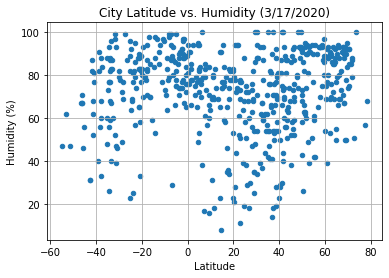

In [38]:
data_df.plot(kind='scatter',x='Lat',y='Humidity',title=f'City Latitude vs. Humidity ({date})')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)

plt.savefig('Latitude_vs_Humidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

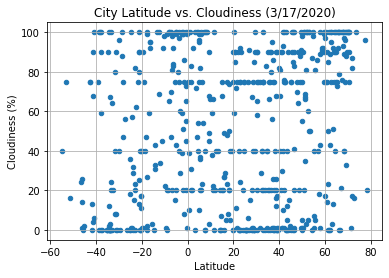

In [39]:
data_df.plot(kind='scatter',x='Lat',y='Cloudiness',title=f'City Latitude vs. Cloudiness ({date})')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)

plt.savefig('Latitude_vs_Cloudiness.png')

plt.show()

#### Latitude vs. Wind Speed Plot

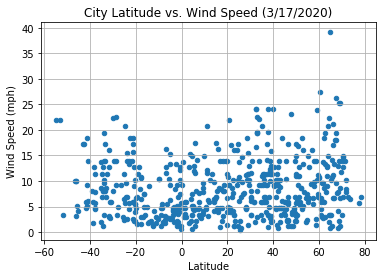

In [40]:
data_df.plot(kind='scatter',x='Lat',y='Wind Speed',title=f'City Latitude vs. Wind Speed ({date})')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True)

plt.savefig('Latitude_vs_Wind_Speed.png')

plt.show()

## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regress(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    return "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [32]:
# Create Northern and Southern Hemisphere DataFrames
northernHemisphere = data_df.loc[data_df['Lat']>0]
southernHemisphere = data_df.loc[data_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.80004426098163


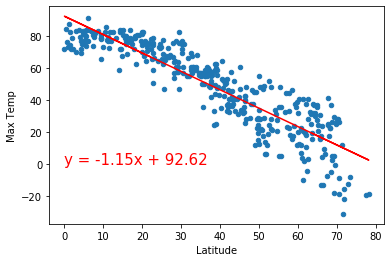

In [41]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Max Temp')

line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Max Temp'])
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.savefig('Latitude_vs_Max_Temp_North.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.38662056823160174


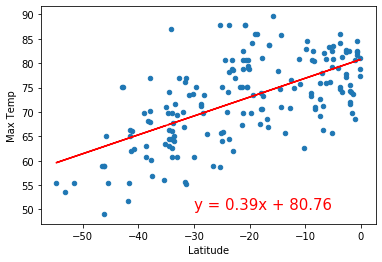

In [42]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Max Temp')

line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Max Temp'])
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.savefig('Latitude_vs_Max_Temp_South.png')

plt.show()

In [44]:
#Conclusions
print("The max temperature seems to increase the closer you get to latitude 0.")
print("However, the correlation isn't as strong in the southern hemisphere.")

The max temperature seems to increase the closer you get to latitude 0.
However, the correlation isn't as strong in the southern hemisphere.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04601181316154731


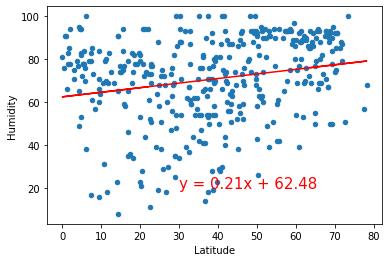

In [45]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Humidity')

line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Humidity'])
plt.annotate(line_eq,(30,20),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.savefig('Latitude_vs_Humidity_North.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16564191161996034


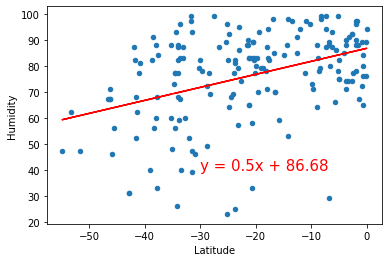

In [46]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Humidity')

line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Humidity'])
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.savefig('Latitude_vs_Humidity_South.png')

plt.show()

In [47]:
#Humidity Conclusions
print("There doesn't appear to be any correlation between humidity and latitude in neither the northern nor southern hemisphere.")

There doesn't appear to be any correlation between humidity and latitude in neither the northern nor southern hemisphere.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.045820190314137456


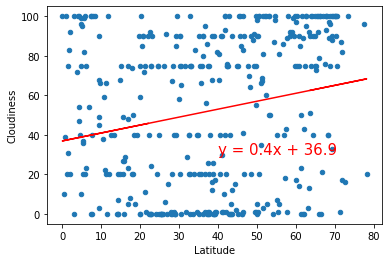

In [48]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Cloudiness')

line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Cloudiness'])
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.savefig('Latitude_vs_Cloudiness_North.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09619088331779259


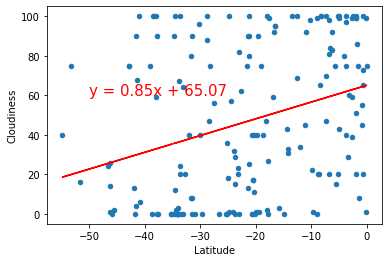

In [49]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Cloudiness')

line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Cloudiness'])
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.savefig('Latitude_vs_Cloudiness_South.png')

plt.show()

In [50]:
#Cloudiness conclusions
print("There doesn't appear to be any correlation between cloudiness and latitude in neither the northern nor southern hemisphere.")

There doesn't appear to be any correlation between cloudiness and latitude in neither the northern nor southern hemisphere.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027171813028712376


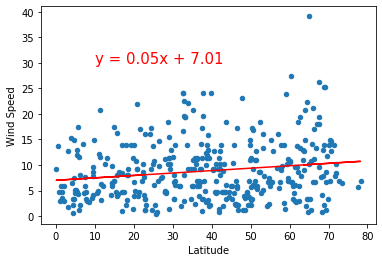

In [51]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Wind Speed')

line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Wind Speed'])
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.savefig('Latitude_vs_Wind_Speed_North.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10693275081879142


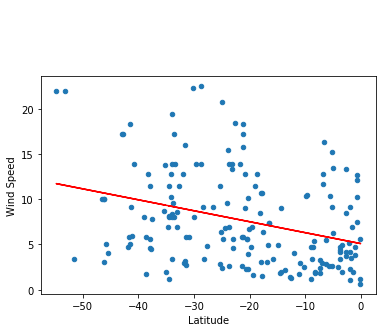

In [52]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Wind Speed')

line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Wind Speed'])
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.savefig('Latitude_vs_Wind_Speed_North.png')

plt.show()

In [54]:
#Wind Speed Conclusions
print("There doesn't appear to be any correlation between wind speed and latitude in neither the northern nor southern hemisphere.")

There doesn't appear to be any correlation between wind speed and latitude in neither the northern nor southern hemisphere.
